In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma



In [2]:
expression <- read.csv('data/validate_layers/expression.csv', header=TRUE, row.names=1)
head(expression)

,human_759_L1,human_j12_L1,human_j3_L1,human_j4_L1,human_j6_L1,human_759_L2,human_j12_L2,human_j3_L2,human_j4_L2,human_j6_L2,⋯,X151509_WM,X151510_WM,X151669_WM,X151670_WM,X151671_WM,X151672_WM,X151673_WM,X151674_WM,X151675_WM,X151676_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.008,0.03927492,0.06363636,0.02100840,0.014925373,0.017241379,0.12571429,0.18367347,0.02564103,0.09174312,⋯,0.00000,0.005586592,0.01415094,0.000000000,0.004576659,0.002570694,0.012,0.011494253,0.007911392,0.007707129
ANGPTL4,0.008,0.17522659,0.01818182,0.04201681,0.052238806,0.004926108,0.34857143,0.05102041,0.02991453,0.08256881,⋯,0.06250,0.055865922,0.03773585,0.040935673,0.013729977,0.015424165,0.126,0.160919540,0.113924051,0.100192678
NUP133,0.088,0.09969789,0.32727273,0.18487395,0.059701493,0.169950739,0.34285714,0.82653061,0.45299145,0.24770642,⋯,0.08125,0.055865922,0.08490566,0.105263158,0.027459954,0.028277635,0.116,0.178981938,0.112341772,0.140655106
SLC6A20,0.006,0.01510574,0.00000000,0.00000000,0.089552239,0.002463054,0.01142857,0.00000000,0.01282051,0.07339450,⋯,0.00000,0.000000000,0.00000000,0.005847953,0.000000000,0.000000000,0.002,0.001642036,0.000000000,0.000000000
FRY,0.220,0.32930514,0.54545455,0.60084034,0.216417910,0.662561576,1.70285714,2.68367347,1.96153846,0.81651376,⋯,0.08750,0.050279330,0.16981132,0.111111111,0.052631579,0.028277635,0.096,0.182266010,0.080696203,0.098265896
CD8A,0.014,0.01812689,0.02727273,0.02100840,0.007462687,0.039408867,0.08571429,0.02040816,0.05982906,0.02752294,⋯,0.00625,0.005586592,0.00000000,0.005847953,0.000000000,0.002570694,0.012,0.016420361,0.004746835,0.007707129


In [3]:
annotation <- read.csv("data/validate_layers/annotation.csv", header=TRUE, row.names=1)
head(annotation)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


## Adult human markers

### Prepare the data
Let's filter human samples in expression and annotation dataframes

In [4]:
specie_annot <- annotation[annotation$condition == 'spatial_libd_human',]
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
151507_L1,L1,151507,660,975177,spatial_libd_human,1
151508_L1,L1,151508,702,851332,spatial_libd_human,1
151509_L1,L1,151509,1137,1633159,spatial_libd_human,1
151510_L1,L1,151510,1122,1521177,spatial_libd_human,1
151673_L1,L1,151673,221,410594,spatial_libd_human,1
151674_L1,L1,151674,362,1115139,spatial_libd_human,1


In [5]:
specie_expr <- expression[, paste0("X", row.names(specie_annot))]
head(specie_expr)

,X151507_L1,X151508_L1,X151509_L1,X151510_L1,X151673_L1,X151674_L1,X151675_L1,X151676_L1,X151507_L2,X151508_L2,⋯,X151509_WM,X151510_WM,X151669_WM,X151670_WM,X151671_WM,X151672_WM,X151673_WM,X151674_WM,X151675_WM,X151676_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.007575758,0.001424501,0.003518030,0.001782531,0.000000000,0.000000000,0.000000000,0.01020408,0.003367003,0.003508772,⋯,0.00000,0.005586592,0.01415094,0.000000000,0.004576659,0.002570694,0.012,0.011494253,0.007911392,0.007707129
ANGPTL4,0.030303030,0.017094017,0.022867194,0.009803922,0.036199095,0.063535912,0.018018018,0.04591837,0.013468013,0.017543860,⋯,0.06250,0.055865922,0.03773585,0.040935673,0.013729977,0.015424165,0.126,0.160919540,0.113924051,0.100192678
NUP133,0.024242424,0.021367521,0.028144239,0.033868093,0.058823529,0.069060773,0.040540541,0.07653061,0.053872054,0.042105263,⋯,0.08125,0.055865922,0.08490566,0.105263158,0.027459954,0.028277635,0.116,0.178981938,0.112341772,0.140655106
SLC6A20,0.003030303,0.002849003,0.003518030,0.004456328,0.000000000,0.005524862,0.013513514,0.01020408,0.000000000,0.000000000,⋯,0.00000,0.000000000,0.00000000,0.005847953,0.000000000,0.000000000,0.002,0.001642036,0.000000000,0.000000000
FRY,0.072727273,0.048433048,0.069481091,0.065062389,0.085972851,0.146408840,0.103603604,0.09693878,0.208754209,0.175438596,⋯,0.08750,0.050279330,0.16981132,0.111111111,0.052631579,0.028277635,0.096,0.182266010,0.080696203,0.098265896
CD8A,0.000000000,0.001424501,0.004397537,0.003565062,0.004524887,0.016574586,0.009009009,0.01530612,0.003367003,0.007017544,⋯,0.00625,0.005586592,0.00000000,0.005847953,0.000000000,0.002570694,0.012,0.016420361,0.004746835,0.007707129


In [6]:
specie_annot$layer <- factor(specie_annot$layer)
specie_annot$sample_id <- factor(specie_annot$sample_id)
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
151507_L1,L1,151507,660,975177,spatial_libd_human,1
151508_L1,L1,151508,702,851332,spatial_libd_human,1
151509_L1,L1,151509,1137,1633159,spatial_libd_human,1
151510_L1,L1,151510,1122,1521177,spatial_libd_human,1
151673_L1,L1,151673,221,410594,spatial_libd_human,1
151674_L1,L1,151674,362,1115139,spatial_libd_human,1


In [7]:
y <- DGEList(counts=specie_expr, samples=specie_annot)

### Filtering and normalization
Let's check a summary table

In [8]:
summary(specie_annot)

 layer     sample_id   psbulk_cells    psbulk_counts      condition        
 L1: 8   151507 : 7   Min.   : 160.0   Min.   : 188918   Length:76         
 L2: 8   151508 : 7   1st Qu.: 238.8   1st Qu.: 872478   Class :character  
 L3:12   151509 : 7   Median : 495.0   Median :1529488   Mode  :character  
 L4:12   151510 : 7   Mean   : 560.4   Mean   :1972675                     
 L5:12   151673 : 7   3rd Qu.: 675.5   3rd Qu.:2861791                     
 L6:12   151674 : 7   Max.   :1841.0   Max.   :6660843                     
 WM:12   (Other):34                                                        
    layer_c     
 Min.   :1.000  
 1st Qu.:3.000  
 Median :4.000  
 Mean   :4.263  
 3rd Qu.:6.000  
 Max.   :7.000  
                

In [9]:
keep.genes <- filterByExpr(y, group=y$samples$layer, min.count=0.01, min.total.count=1)
table(keep.genes)

keep.genes
FALSE  TRUE 
 4815 10552 

In [10]:
y <- y[keep.genes, , keep=FALSE]

In [11]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
X151507_L1,1,920.9364,0.9676238,L1,151507,660,975177,spatial_libd_human,1
X151508_L1,1,758.1396,0.9653469,L1,151508,702,851332,spatial_libd_human,1
X151509_L1,1,923.9296,0.9919233,L1,151509,1137,1633159,spatial_libd_human,1
X151510_L1,1,868.7398,0.9898340,L1,151510,1122,1521177,spatial_libd_human,1
X151673_L1,1,1239.8145,1.0579020,L1,151673,221,410594,spatial_libd_human,1
X151674_L1,1,2070.1243,1.0671742,L1,151674,362,1115139,spatial_libd_human,1
X151675_L1,1,1037.9414,1.0414170,L1,151675,222,349528,spatial_libd_human,1
X151676_L1,1,1601.7653,1.0472443,L1,151676,196,480260,spatial_libd_human,1
X151507_L2,1,2036.2862,0.9846033,L2,151507,297,912278,spatial_libd_human,2


In [12]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9030  0.9842  0.9988  1.0005  1.0212  1.0672 

### Data exploration

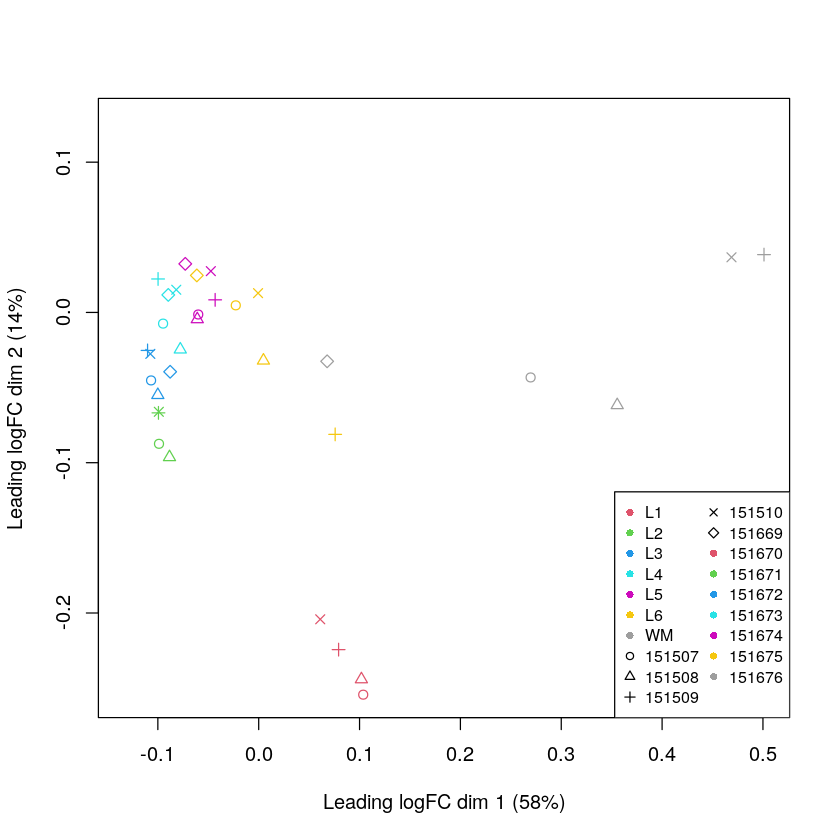

In [13]:
# Plot MDS for human markers
layer <- as.factor(y$samples$layer)
sample_id <- y$samples$sample_id
plotMDS(y, pch=c(1:5)[sample_id], col=c(2:8)[layer])
legend("bottomright", legend=c(levels(layer), levels(sample_id)), pch=c(rep(16,7), c(1:5)), col=c(c(2:8), rep(1,5)), cex=0.8, ncol=2)

### Design matrix

In [14]:
design <- model.matrix(~ 0 + layer + sample_id)
colnames(design) <- gsub("sample_id", "", colnames(design))
colnames(design) <- gsub("layer", "", colnames(design))
head(design)

,L1,L2,L3,L4,L5,L6,WM,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Dispersion estimation

In [15]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 9.765625e-05

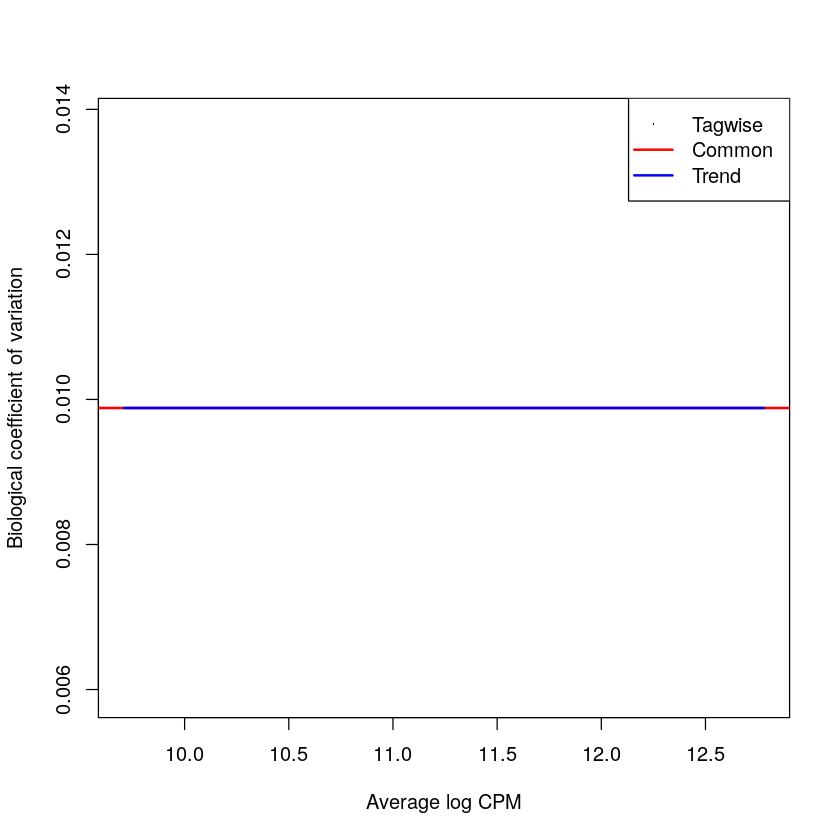

In [16]:
plotBCV(y)

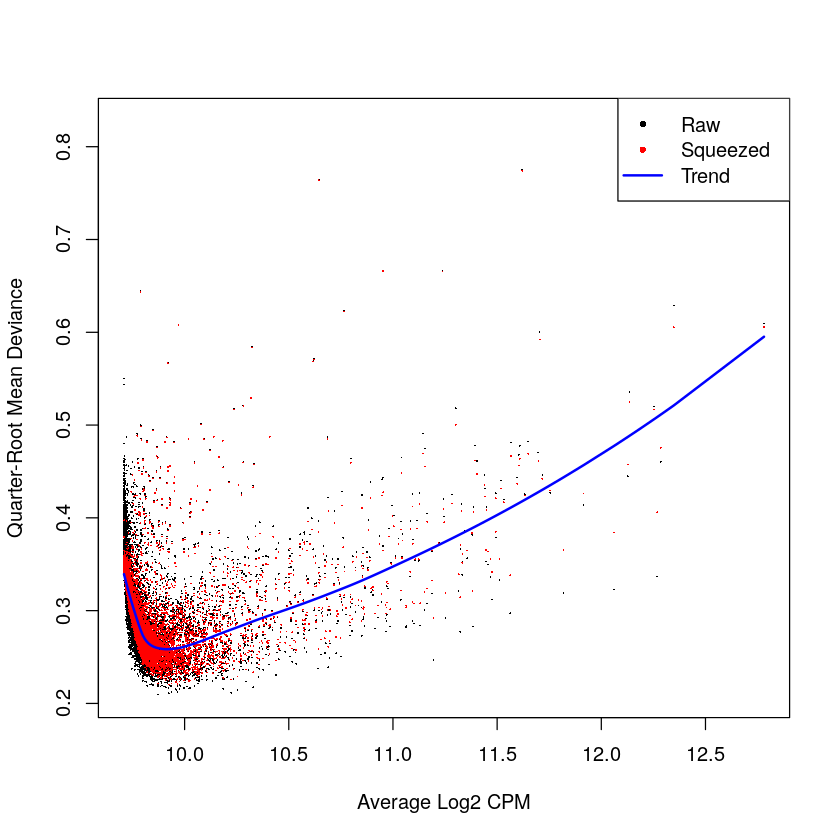

In [17]:
fit <- glmQLFit(y, design, robust=TRUE, legacy=FALSE)
plotQLDisp(fit)

### Marker genes identification
Make a contrast matrix and perform quasi-likelihood F-tests

In [18]:
ncls <- nlevels(layer)
contr <- rbind( matrix(1/(1 - ncls), ncls, ncls), matrix(0, ncol(design)-ncls, ncls) )
diag(contr) <- 1
rownames(contr) <- colnames(design)
colnames(contr) <- levels(layer)
contr
qlf <- list()
for(i in 1:ncls) {
  qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
  qlf[[i]]$comparison <- paste0(levels(layer)[i],'_vs_others')
}

,L1,L2,L3,L4,L5,L6,WM
L1,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L2,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L3,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L4,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667
L5,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667
L6,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667
WM,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000
151508,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
151509,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
151510,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [19]:
topTags(qlf[[1]], n=10L)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VIM,1.4124650,10.086993,406.4469,9.164889e-46,9.670791e-42
CXCL14,1.4657490,10.121534,308.8131,2.726723e-37,1.438619e-33
IGFBP7,0.7486273,10.077582,190.9948,6.115704e-29,2.151097e-25
SPARC,1.1431233,10.052277,176.0238,9.555168e-27,2.520653e-23
MYL9,1.5570656,9.817935,247.5506,4.635820e-26,9.783435e-23
ATP1A2,0.6974605,10.291202,159.0963,1.151112e-24,2.024423e-21
FABP7,1.3958088,9.845246,184.9246,6.509558e-24,9.812693e-21
METRN,0.7984691,10.252411,143.9196,2.612087e-23,3.445343e-20
FAM107A,0.5947224,10.313864,145.2088,3.443825e-23,4.037693e-20


In [20]:
if (!dir.exists("data/validate_layers/adults/")) {
  dir.create("data/validate_layers/adults/", recursive = TRUE)
}
for(i in 1:ncls) write.csv(qlf[[i]]$table, file=paste0('data/validate_layers/adults/degenes_', levels(layer)[i], '.csv'))

In [21]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call('cbind', dt)
dt.all

,L1_vs_others,L2_vs_others,L3_vs_others,L4_vs_others,L5_vs_others,L6_vs_others,WM_vs_others
Down,622,1017,744,634,686,361,2395
NotSig,9317,8326,8695,8614,8728,9605,5671
Up,613,1209,1113,1304,1138,586,2486


Let's make a heatmap of the top markers

In [22]:
top <- 20
topMarkers <- list()
for (i in 1:ncls) {
  ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
  up <- qlf[[i]]$table$logFC[ord] > 0
  topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
}

topMarkers <- unique(unlist(topMarkers))
topMarkers

[1] "VIM"      "CXCL14"   "IGFBP7"   "SPARC"    "MYL9"     "ATP1A2"  
  [7] "FABP7"    "METRN"    "FAM107A"  "SNORC"    "MT2A"     "FXYD1"   
 [13] "PTN"      "NCAN"     "MT1M"     "RAMP1"    "AQP4"     "EZR"     
 [19] "CST3"     "CLU"      "HPCAL1"   "SERPINE2" "HOPX"     "CAMK2N1" 
 [25] "DPP6"     "YJEFN3"   "EGR3"     "PCDH8"    "ITPKA"    "PCDH7"   
 [31] "SIPA1L1"  "LAMP5"    "PPFIA2"   "ITPR1"    "NCDN"     "VSTM2A"  
 [37] "CYP46A1"  "ENC1"     "CBLN4"    "GRIA2"    "NSG2"     "CRYM"    
 [43] "CALB1"    "PIN1"     "HAPLN4"   "GPX3"     "GRIA4"    "GABRD"   
 [49] "CA10"     "CARTPT"   "ATP1A1"   "INA"      "SNCG"     "ATP1B1"  
 [55] "SCN1B"    "PVALB"    "NEFM"     "VAMP1"    "NEFH"     "PARM1"   
 [61] "NEFL"     "RORB"     "NREP"     "NSG1"     "CCNI"     "CHGA"    
 [67] "DCLK1"    "SATB1"    "NAP1L5"   "FRMPD2"   "RCAN2"    "PCP4"    
 [73] "SMYD2"    "TTC9B"    "TMSB10"   "SLC24A2"  "IPCEF1"   "PFKP"    
 [79] "KCNC2"    "EFHD2"    "COX7A1"   "FAM3C"    "SYT1"     "SNRPN"   
 [85] "SSBP3"    "CLSTN2"   "STMN1"    "DIRAS2"   "B3GALT2"  "TBR1"    
 [91] "MAP2K1"   "SLC35F1"  "HS3ST2"   "SYNPR"    "NPTX1"    "TMEFF2"  
 [97] "SNCA"     "CPNE5"    "PCDH17"   "SEMA3E"   "NTNG2"    "MMD"     
[103] "ISLR"     "MOBP"     "TF"       "CNP"      "CLDND1"   "PTP4A2"  
[109] "SPP1"     "PAQR6"    "PLP1"     "PPP1R14A" "RNASE1"   "QKI"     
[115] "NENF"     "SCD"      "MBP"      "CRYAB"    "MARCKSL1" "GSN"     
[121] "RHOA"     "EEF1D"    "APOD"

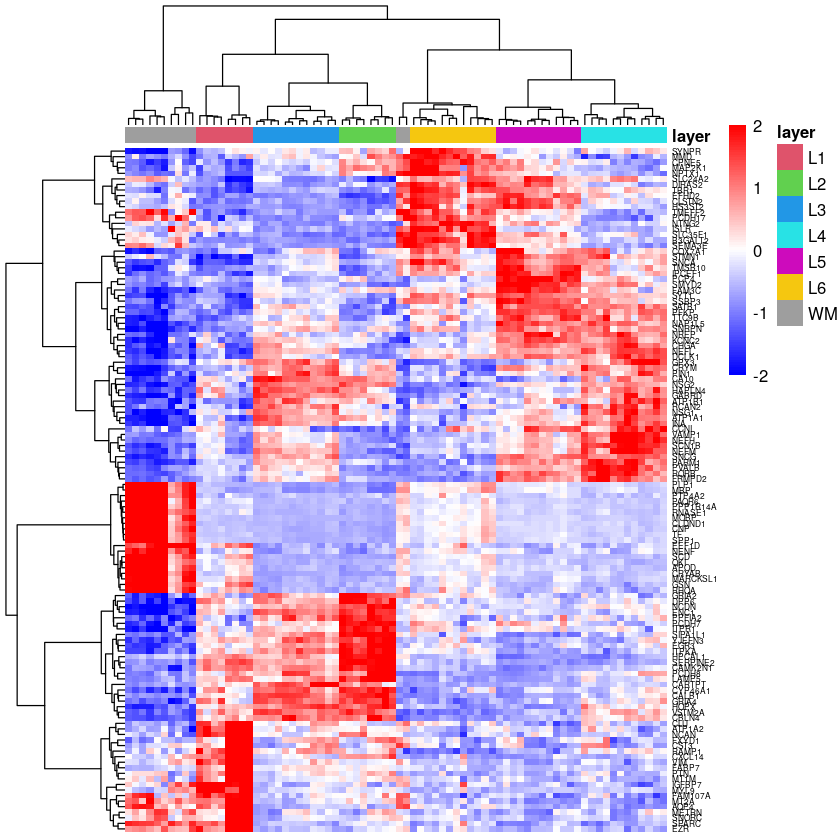

In [23]:
lcpm <- cpm(y, log=TRUE)
annot <- data.frame(layer)
rownames(annot) <- colnames(y)
ann_colors <- list(layer=2:8)
names(ann_colors$layer) <- levels(layer)
pheatmap::pheatmap(lcpm[topMarkers,], breaks=seq(-2,2,length.out=101),
                   color=colorRampPalette(c("blue", "white", "red"))(100), scale="row",
                   ckuster_cols=TRUE, border_color="NA", fontsize_row=5,
                   treeheight_row=70, treeheight_col=70, cuttree_cols=7,
                   clustering_method="ward.D2", show_colnames=FALSE,
                   annotation_col=annot, annotation_colors=ann_colors)

# Session info

In [24]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1 edgeR_4.4.2   limma_3.62.2 

loaded via a namespace (and not attached):
 [1] gtable_0.3.5       jsonlite_1.8.8     dplyr_1.1.4        compiler_4.4.0    
 [5] cra